# Heart Failure Clinical Records Projesi
**Heart Failure Clinical Records veri seti, UCI Machine Learning Repository'den alınmıştır. Veri seti kullanılarak çeşitli makine öğrenimi modelleriyle kalp hastalığını tahmin etmeye yönelik bir analiz gerçekleştirilmiştir.**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

**Pletelets değeri tutarlı olması amacıyla kiloplatelets/mL'a dönüştürüldü.**

In [2]:
hf = pd.read_csv("../data/heart_failure_clinical_records.csv")

In [3]:
hf.platelets = hf.platelets/1000

In [4]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_state
0,75.0,0,582,0,20,1,265.00000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263.35803,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162.00000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210.00000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327.00000,2.7,116,0,0,8,1


In [5]:
hf["CPK"] = hf["creatinine_phosphokinase"]
hf["HBP"] = hf["high_blood_pressure"]

hf = hf.drop("creatinine_phosphokinase", axis=1)
hf = hf.drop("high_blood_pressure", axis=1)

In [6]:
hf.describe()

,age,anaemia,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_state,CPK,HBP
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,0.431438,0.418060,38.083612,263.358029,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107,581.839465,0.351171
std,11.894809,0.496107,0.494067,11.834841,97.804237,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767,970.287881,0.478136
min,40.000000,0.000000,0.000000,14.000000,25.100000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000,23.000000,0.000000
25%,51.000000,0.000000,0.000000,30.000000,212.500000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000,116.500000,0.000000
50%,60.000000,0.000000,0.000000,38.000000,262.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000,250.000000,0.000000
75%,70.000000,1.000000,1.000000,45.000000,303.500000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000,582.000000,1.000000
max,95.000000,1.000000,1.000000,80.000000,850.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000,7861.000000,1.000000


In [7]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                299 non-null    float64
 1   anaemia            299 non-null    int64  
 2   diabetes           299 non-null    int64  
 3   ejection_fraction  299 non-null    int64  
 4   platelets          299 non-null    float64
 5   serum_creatinine   299 non-null    float64
 6   serum_sodium       299 non-null    int64  
 7   sex                299 non-null    int64  
 8   smoking            299 non-null    int64  
 9   time               299 non-null    int64  
 10  death_state        299 non-null    int64  
 11  CPK                299 non-null    int64  
 12  HBP                299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**time değişkeninin modellemeye katkısı olmayacağı düşünülerek, diğer sayısal değişkenlerin boxplot ve kdplot grafikleri oluşturuldu.**

In [8]:
numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "HBP", "sex", "smoking"]

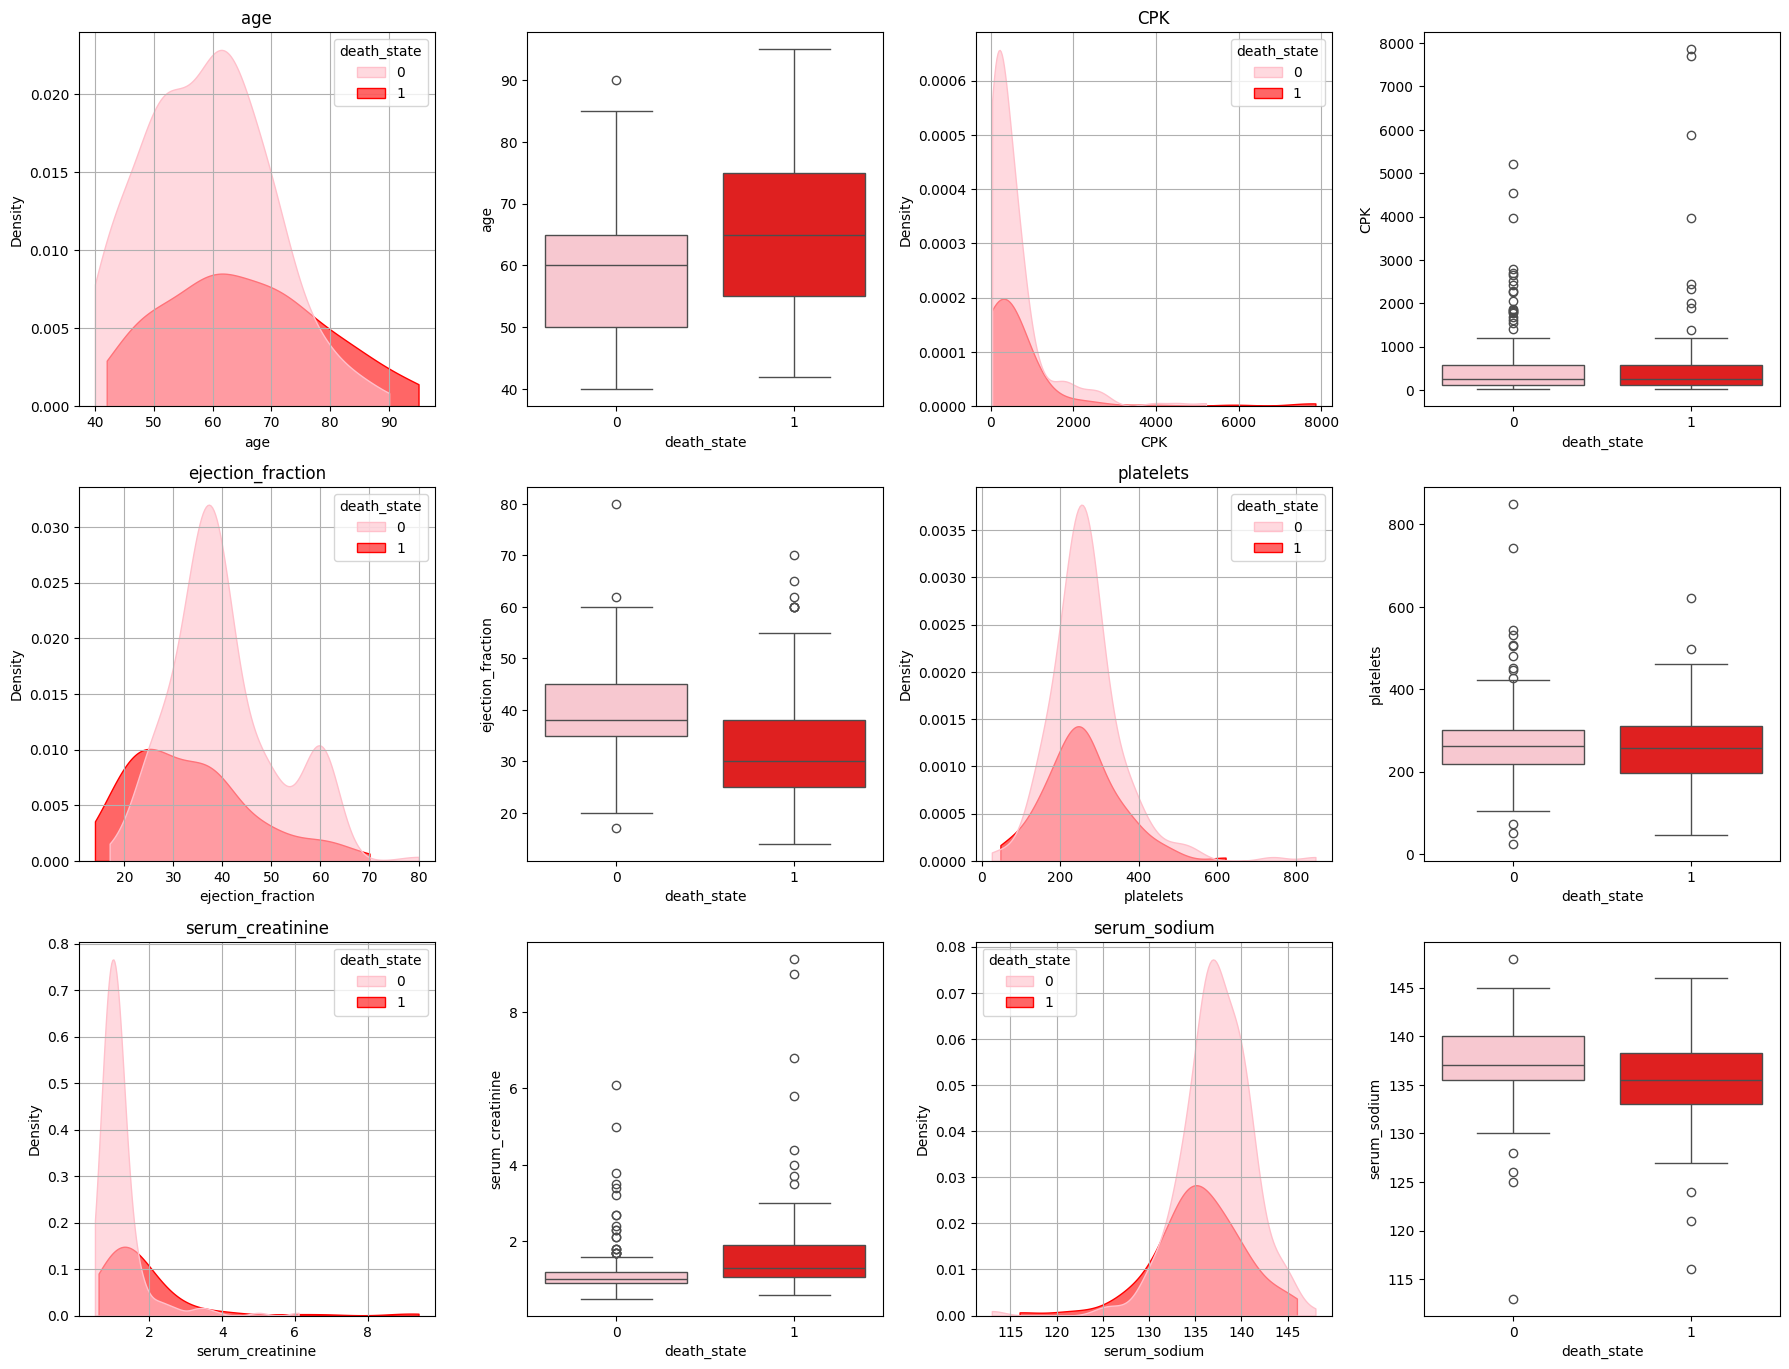

In [9]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    # KDE plot
    plt.subplot(6, 4, 2 * i + 1)  # Adjusting subplot grid
    plt.subplots_adjust(hspace=0.25, wspace=0.3)
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data=hf, x=col, hue="death_state", fill=True, alpha=0.6,
                palette=["#FFC0CB", "#FF0000"], cut=0)

    # Box plot
    plt.subplot(6, 4, 2 * i + 2)
    sns.boxplot(data=hf, x="death_state", y=col, hue="death_state",
                palette=["#FFC0CB", "#FF0000"], dodge=False, legend=False)

plt.tight_layout()
plt.show()


**ejection_fraction ve serum_creatinine özellikleri veri seti için en faydalı olabilecek değişkenlerdir.**

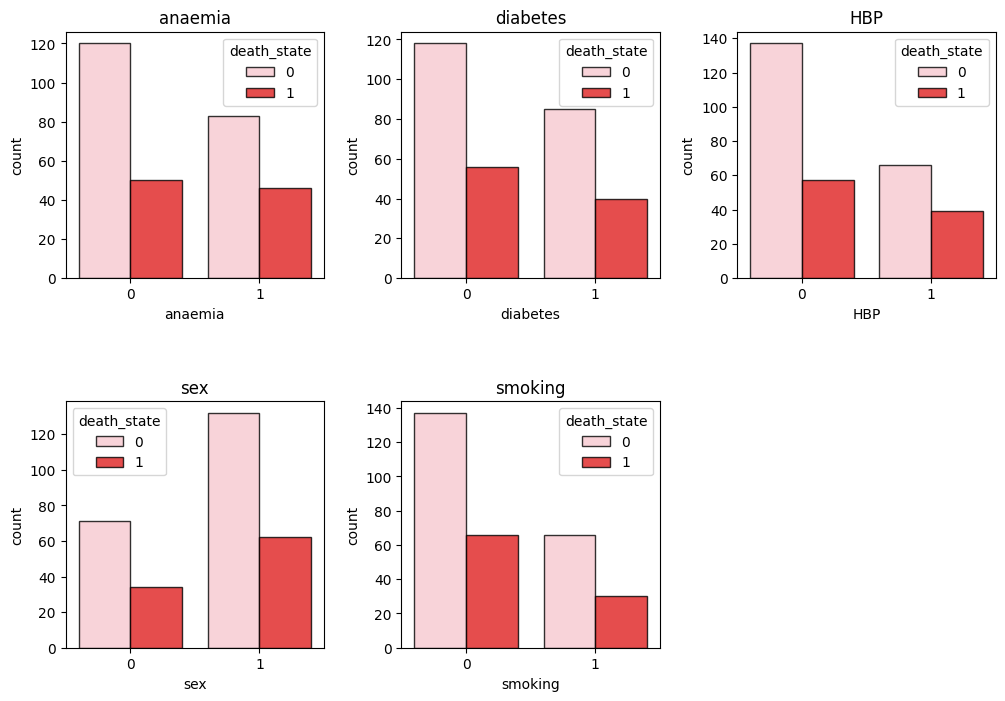

In [11]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=hf, x=col, hue="death_state", palette = ["#FFC0CB", "#FF0000"], alpha=0.8, edgecolor="k", linewidth=1)

**Bu aşamada, normalizasyon işlemini uygulayarak verinin dağılımını görselleştirildi ve normalleştirilmiş veriyi orijinal veri ile karşılaştırmak için KDE ve boxplot grafiklerini kullanıldı.**

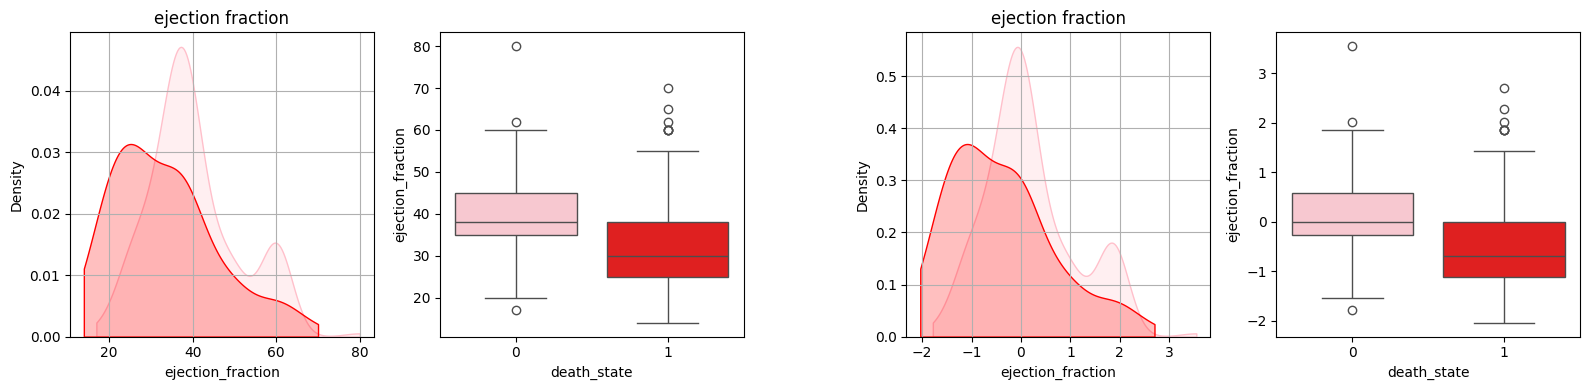

In [12]:
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
from matplotlib import gridspec

hf_norm = hf.copy()

for i, col in enumerate(numerical_features):
    hf_norm[[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(hf_norm[[col]])
    
plt.figure(figsize=(16, 4))
gs  = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 0.1, 1, 1])

plt.subplot(gs[0])   
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf.loc[hf["death_state"]==0, "ejection_fraction"], label="alive", color="#FFC0CB", fill=True, cut=0)
sns.kdeplot(hf.loc[hf["death_state"]==1, "ejection_fraction"], label="dead", color="#FF0000", fill=True, cut=0)

plt.subplot(gs[1])
sns.boxplot(y="ejection_fraction", data=hf, x="death_state", hue="death_state", palette=["#FFC0CB", "#FF0000"], dodge=False, legend=False)

plt.subplot(gs[2])
plt.axis('off')

plt.subplot(gs[3])
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf_norm.loc[hf_norm["death_state"]==0, "ejection_fraction"], label="alive", color="#FFC0CB", fill=True, cut=0)
sns.kdeplot(hf_norm.loc[hf_norm["death_state"]==1, "ejection_fraction"], label="dead", color="#FF0000", fill=True, cut=0)

plt.subplot(gs[4])
sns.boxplot(y="ejection_fraction", data=hf_norm, x="death_state", hue="death_state", palette=["#FFC0CB", "#FF0000"], dodge=False, legend=False)

plt.tight_layout()
plt.show()


**Bu aşamada, veri setindeki tüm özellikler arasında Pearson korelasyon katsayısını hesaplayarak değişkenler arasındaki ilişkileri görselleştirmek için bir ısı haritası oluşturuldu.**

In [13]:
all_features = categorical_features.copy()
all_features.extend(numerical_features)

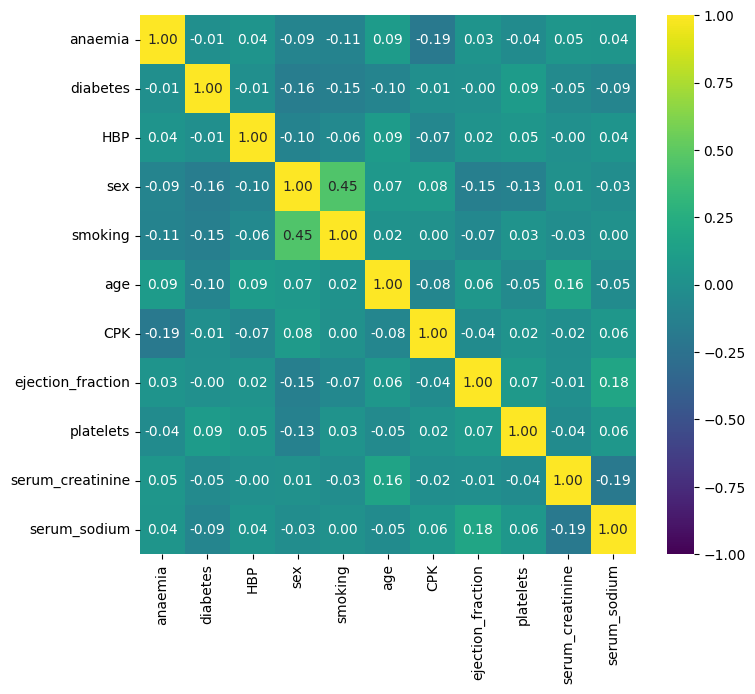

In [14]:
plt.figure(figsize=(8, 7))
sns.heatmap(hf_norm[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

**Shapiro-Wilk testi sonuçlarına göre, CPK, ejection_fraction, serum_creatinine, ve platelets özelliklerinin her iki sınıfta da normal dağılım göstermediği tespit edilmiştir. Buna karşın, age ve serum_sodium özellikleri, özellikle belirli sınıflarda normal dağılım özelliklerine daha yakın sonuçlar vermiştir.**

In [19]:
from scipy.stats import shapiro
import pandas as pd

index = [[feat, "statistic"] for feat in numerical_features]
index.extend([[feat, "p-value"] for feat in numerical_features])
index = pd.MultiIndex.from_tuples(index)

sw_df = pd.DataFrame(index=index, columns=["Both Classes", "death_state=0", "death_state=1"])

for feat in numerical_features:
    stat, p = shapiro(hf[feat])
    sw_df.loc[(feat, "statistic"), "Both Classes"] = stat
    sw_df.loc[(feat, "p-value"), "Both Classes"] = p

    subset_0 = hf_norm.loc[hf["death_state"] == 0, feat]
    stat, p = shapiro(subset_0)
    sw_df.loc[(feat, "statistic"), "death_state=0"] = stat
    sw_df.loc[(feat, "p-value"), "death_state=0"] = p

    subset_1 = hf_norm.loc[hf["death_state"] == 1, feat]
    stat, p = shapiro(subset_1)
    sw_df.loc[(feat, "statistic"), "death_state=1"] = stat
    sw_df.loc[(feat, "p-value"), "death_state=1"] = p


pd.set_option('display.float_format', '{:.3g}'.format)
sw_df


,,Both Classes,death_state=0,death_state=1
age,statistic,0.975,0.98,0.969
CPK,statistic,0.514,0.628,0.439
ejection_fraction,statistic,0.947,0.92,0.927
platelets,statistic,0.912,0.873,0.971
serum_creatinine,statistic,0.551,0.589,0.608
serum_sodium,statistic,0.939,0.925,0.958
age,p-value,5.35e-05,0.00483,0.0221
CPK,p-value,7.05e-28,8.51e-21,1.99e-17
ejection_fraction,p-value,7.22e-09,4.7e-09,4.53e-05
platelets,p-value,2.88e-12,5.14e-12,0.0336


**Levene testi sonuçlarına göre, age, serum_creatinine, ve serum_sodium özellikleri için p-değerleri 0.05'in altındadır, bu da bu özelliklerin iki sınıf (death_state=0 ve death_state=1) arasında varyans eşitliğini sağlamadığını göstermektedir. Diğer özellikler olan CPK, ejection_fraction, ve platelets için varyanslar arasında anlamlı bir fark bulunmamıştır (p > 0.05).**

Levene Test for age: statistic=7.134, p-value=0.00798


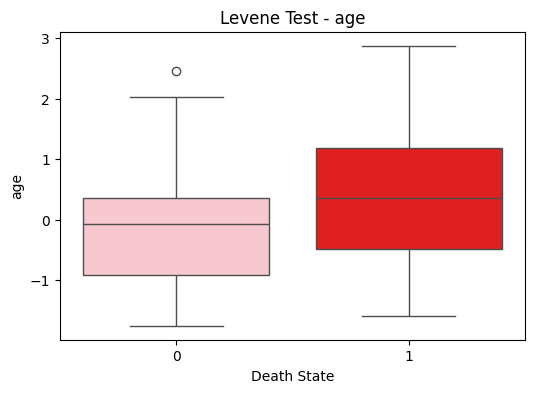

Levene Test for CPK: statistic=1.030, p-value=0.311


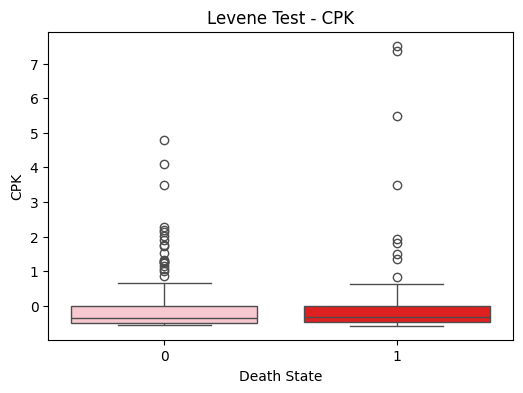

Levene Test for ejection_fraction: statistic=3.702, p-value=0.0553


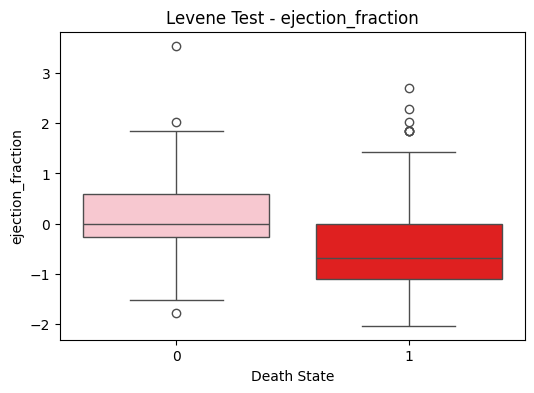

Levene Test for platelets: statistic=1.085, p-value=0.298


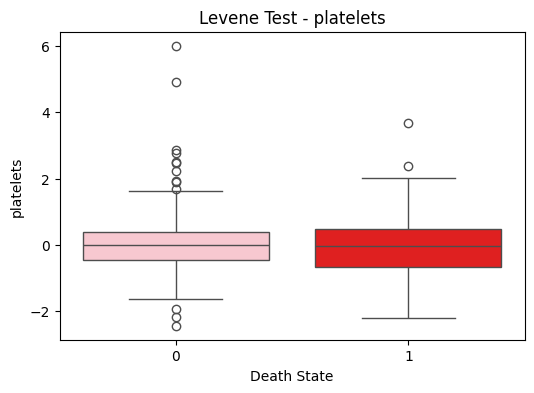

Levene Test for serum_creatinine: statistic=16.243, p-value=7.09e-05


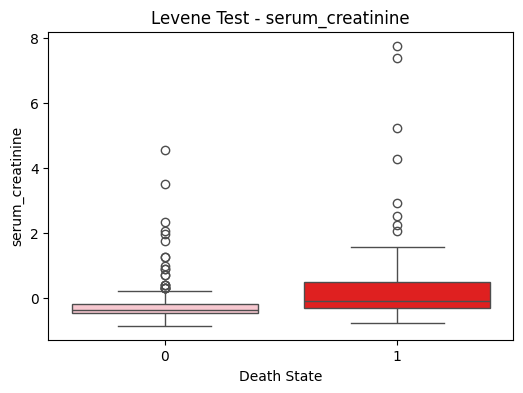

Levene Test for serum_sodium: statistic=5.274, p-value=0.0223


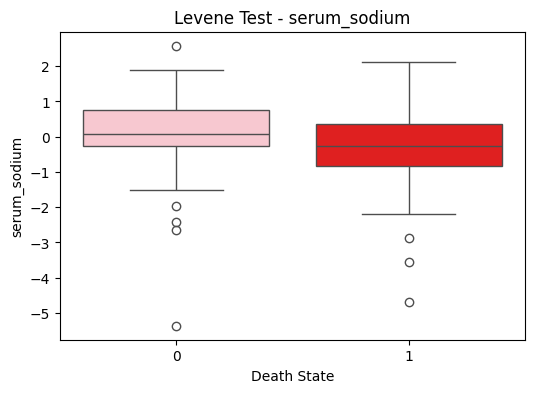

In [23]:
from scipy.stats import levene, bartlett

for feature in numerical_features:
    stat, p = levene(hf_norm.loc[hf['death_state'] == 0, feature], 
                     hf_norm.loc[hf['death_state'] == 1, feature])
    print(f"Levene Test for {feature}: statistic={stat:.3f}, p-value={p:.3g}")

    plt.figure(figsize=(6, 4))
    sns.boxplot(x='death_state', y=feature, data=hf_norm, hue = 'death_state', palette=["#FFC0CB", "#FF0000"],dodge=False, legend=False)

    plt.title(f'Levene Test - {feature}')
    plt.xlabel('Death State')
    plt.ylabel(feature)
    plt.show() 

**Kolmogorov-Smirnov testi sonuçlarına göre, age, ejection_fraction, serum_creatinine ve serum_sodium değişkenleri için p-değerleri 0.05'in altındadır, bu da bu değişkenlerin iki sınıf (death_state=0 ve death_state=1) arasında dağılımlarının anlamlı derecede farklı olduğunu göstermektedir. CPK ve platelets değişkenleri için ise p-değerleri 0.05'in üzerinde olduğundan, bu değişkenlerin iki sınıf arasında benzer dağılımlara sahip olduğu söylenebilir.**

Kolmogorov-Smirnov Test for age: statistic=0.226, p-value=0.00209


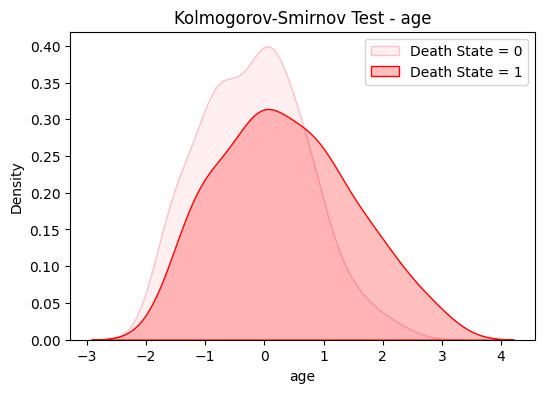

Kolmogorov-Smirnov Test for CPK: statistic=0.100, p-value=0.487


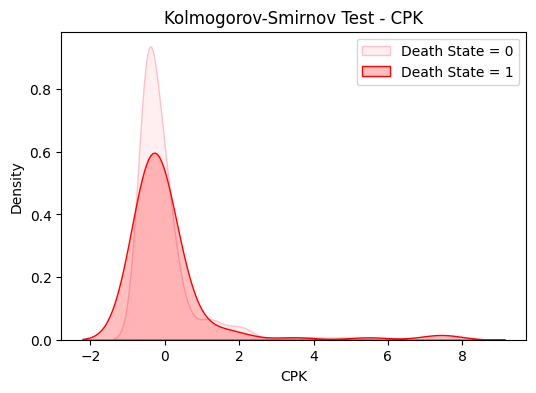

Kolmogorov-Smirnov Test for ejection_fraction: statistic=0.324, p-value=1.36e-06


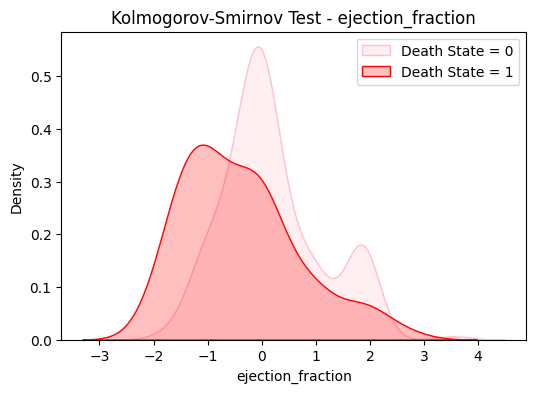

Kolmogorov-Smirnov Test for platelets: statistic=0.107, p-value=0.405


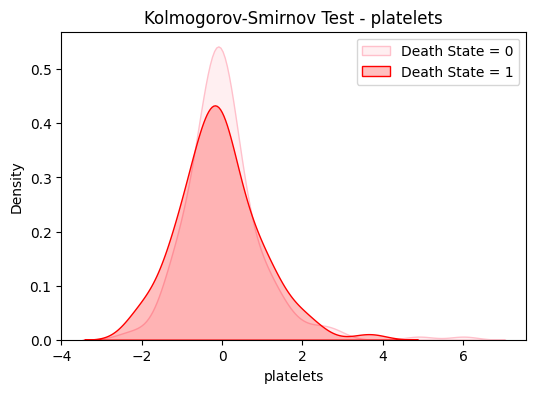

Kolmogorov-Smirnov Test for serum_creatinine: statistic=0.351, p-value=1.19e-07


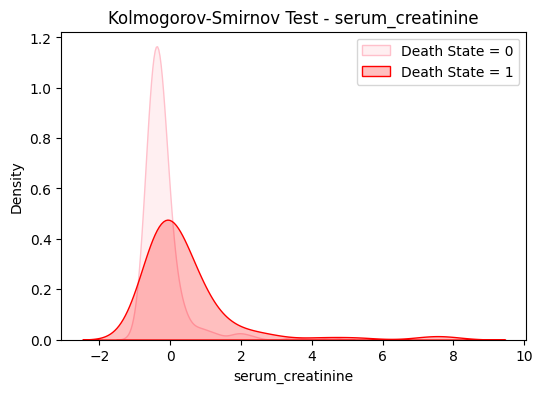

Kolmogorov-Smirnov Test for serum_sodium: statistic=0.249, p-value=0.00048


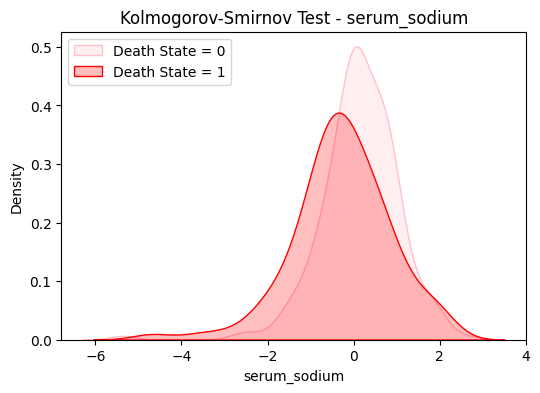

In [26]:
from scipy.stats import ks_2samp

for feature in numerical_features:
    stat, p = ks_2samp(hf_norm.loc[hf['death_state'] == 0, feature],
                       hf_norm.loc[hf['death_state'] == 1, feature])
    print(f"Kolmogorov-Smirnov Test for {feature}: statistic={stat:.3f}, p-value={p:.3g}")
    
    plt.figure(figsize=(6, 4))
    sns.kdeplot(hf_norm.loc[hf['death_state'] == 0, feature], label='Death State = 0', color='#FFC0CB', fill=True)
    sns.kdeplot(hf_norm.loc[hf['death_state'] == 1, feature], label='Death State = 1', color='#FF0000', fill=True)
    plt.title(f'Kolmogorov-Smirnov Test - {feature}')
    plt.xlabel(feature)
    plt.legend()
    plt.show()
    


**Mann-Whitney U testi sonuçlarına göre, yaş (age), ejeksiyon fraksiyonu (ejection_fraction), serum kreatinin (serum_creatinine) ve serum sodyum (serum_sodium) değişkenlerinin, ölüm durumu (death_state) grupları arasında istatistiksel olarak anlamlı farklılıklar gösterdiği tespit edilmiştir (p < 0.05). Bu değişkenlerin iki grup arasındaki farkları, violin plot görselleriyle de açıkça gözlemlenmektedir. Öte yandan, kreatin fosfokinaz (CPK) ve platelet değerlerinin p-değerleri 0.05'in üzerinde olup, bu değişkenlerin iki grup arasında anlamlı bir fark göstermediği sonucuna varılmıştır.**

Mann-Whitney Test for age: statistic=7121.000, p-value=0.000167


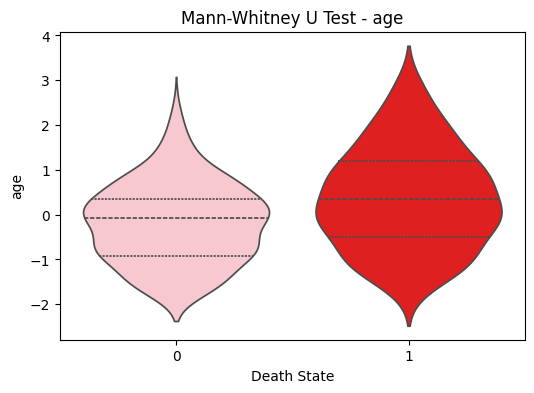

Mann-Whitney Test for CPK: statistic=9460.000, p-value=0.684


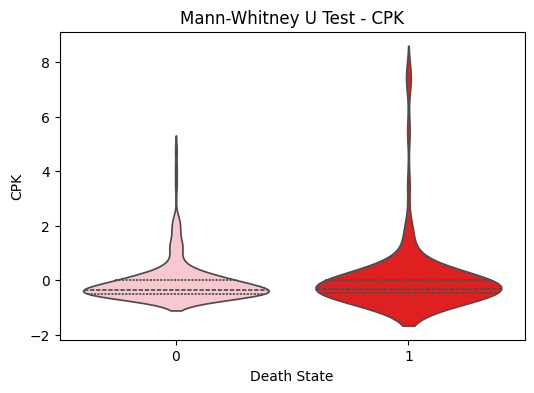

Mann-Whitney Test for ejection_fraction: statistic=13176.500, p-value=7.37e-07


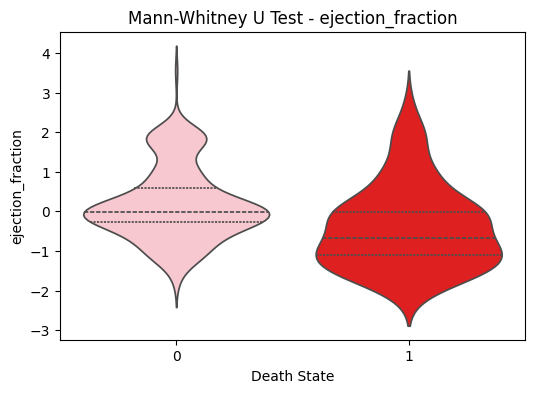

Mann-Whitney Test for serum_creatinine: statistic=5298.000, p-value=1.58e-10


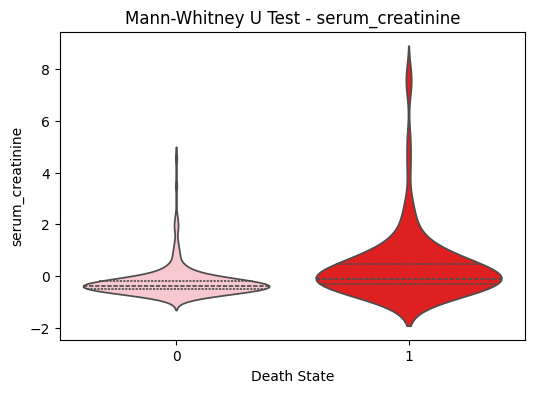

Mann-Whitney Test for serum_sodium: statistic=12261.500, p-value=0.000293


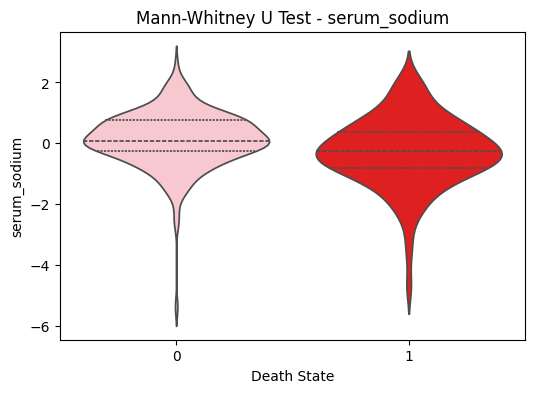

In [58]:
from scipy.stats import mannwhitneyu

for feature in numerical_features:
    stat, p = mannwhitneyu(hf_norm.loc[hf['death_state'] == 0, feature],
                           hf_norm.loc[hf['death_state'] == 1, feature])
    print(f"Mann-Whitney Test for {feature}: statistic={stat:.3f}, p-value={p:.3g}")
    
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='death_state', y=feature, data=hf_norm, hue='death_state', palette=["#FFC0CB", "#FF0000"], inner="quartile", dodge=False, legend=False)
    plt.title(f'Mann-Whitney U Test - {feature}')
    plt.xlabel('Death State')
    plt.ylabel(feature)
    plt.show()


**Veri seti, eğitim ve test/verifikasyon olarak ikiye ayrılmıştır. Eğitim seti, modelin öğrenmesi için %75 oranında bir bölünme ile oluşturulmuş, geri kalan %25'lik kısım ise modelin performansını değerlendirmek için test/verifikasyon seti olarak kullanılmıştır.Elde edilen sonuçlara göre, eğitim seti 224 örnekten, test/verifikasyon seti ise 75 örnekten oluşmaktadır.**

In [34]:
from sklearn.model_selection import train_test_split, StratifiedKFold
train_ratio = 0.75
val_ratio = 0.25

ho_train_df, ho_val_df = train_test_split(hf_norm, train_size = train_ratio, random_state=42)
unnorm_ho_train_df, unnorm_ho_val_df = train_test_split(hf, train_size = train_ratio, random_state=42)

print("Holdout split:")
print(f"Train samples: {len(ho_train_df)}")
print(f"Validation/Test samples: {len(ho_val_df)}")

Holdout split:
Train samples: 224
Validation/Test samples: 75


**Eğitim ve test/verifikasyon setlerinde hedef değişkenin sınıf dağılımları incelenmiştir. Eğitim setinde death_state=0 %71, death_state=1 ise %29 oranındayken, test/verifikasyon setinde death_state=0 %58.7, death_state=1 %41.3 oranında olduğu gözlemlenmiştir.**

In [35]:
print(ho_train_df['death_state'].value_counts(normalize=True))
print(ho_val_df['death_state'].value_counts(normalize=True))

death_state
0   0.71
1   0.29
Name: proportion, dtype: float64
death_state
0   0.587
1   0.413
Name: proportion, dtype: float64


**Bu aşamada, bağımsız değişkenlerin hedef değişken olan death_state ile olan ilişkisini değerlendirmek amacıyla mutual information analizi yapılmıştır. Sonuçlara göre, ejection_fraction ve serum_creatinine değişkenleri death_state ile en yüksek ilişkiye sahip özellikler olarak öne çıkmıştır. Diğer değişkenler ise daha düşük düzeyde ilişki göstermiştir.**

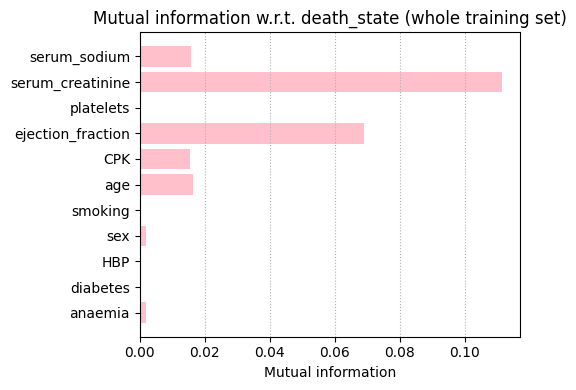

In [36]:
from sklearn.feature_selection import mutual_info_classif

    
MI = (mutual_info_classif(ho_train_df[all_features],
                             ho_train_df["death_state"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=42))

plt.figure(figsize=(5.4, 4))
plt.barh(y=all_features, width=MI, color="#FFC0CB")
plt.title("Mutual information w.r.t. death_state (whole training set)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

**anaemia değişkeninin death_state ile ilişkilendirilebilirliğini test etmek amacıyla Chi-Square testi uygulanmıştır. Gözlemlenen sıklık tablosu, her bir anaemia durumu (0 veya 1) için death_state (0 veya 1) dağılımını göstermektedir.**

In [37]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

print("Observed")
ctable = pd.crosstab(ho_train_df["anaemia"], ho_train_df["death_state"])
ctable.columns = ["death_state=0", "death_state=1"]
ctable.index = ["anaemia=0", "anaemia=1"]
ctable.loc["Total"] = ctable.sum()
ctable["Total"] = ctable.sum(axis=1)
ctable

Observed


,death_state=0,death_state=1,Total
anaemia=0,94,34,128
anaemia=1,65,31,96
Total,159,65,224


**Bu adımda Chi-Square testi için beklenen değerler hesaplanmıştır. Beklenen sıklık tablosu, anaemia ve death_state değişkenlerinin bağımsız olduğu varsayımı altında her bir kategori için beklenen frekansları göstermektedir.**

In [38]:
print("Expected")
contingency_table = pd.crosstab(ho_train_df["anaemia"], ho_train_df["death_state"])
stat, p, dof, expected = chi2_contingency(contingency_table)
expected = pd.DataFrame(expected)
expected.columns = ["death_state=0", "death_state=1"]
expected.index = ["anaemia=0", "anaemia=1"]
expected

Expected


,death_state=0,death_state=1
anaemia=0,90.9,37.1
anaemia=1,68.1,27.9


**Chi-Square testi uygulanarak kategorik özelliklerin death_state (ölüm durumu) ile bağımlılığı incelenmiştir. Soldaki grafikte test istatistikleri, sağdaki grafikte ise p-değerleri görselleştirilmiştir. Test sonuçlarına göre, düşük p-değerleri (<0.05) death_state ile belirli kategorik değişkenler arasında anlamlı bir ilişki olduğunu gösterirken, yüksek p-değerleri bu ilişkiyi desteklememektedir.**

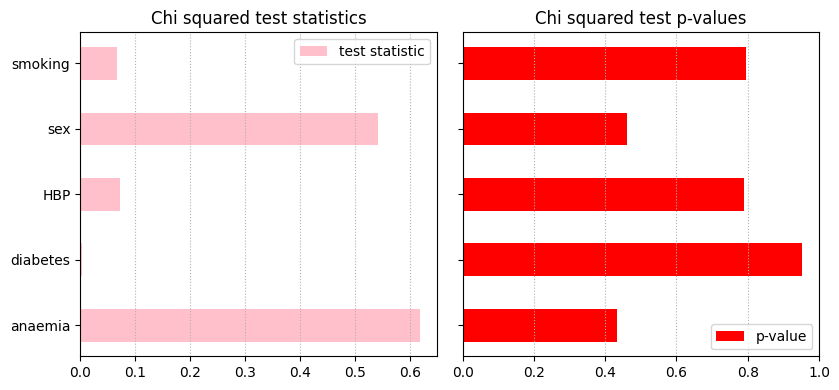

In [39]:
def chi2_test(df, feat1, feat2):

    contingency_table = pd.crosstab(df[feat1], df[feat2])
    
    stat, p, dof, expected = chi2_contingency(contingency_table)
    prob = 0.95 # alpha=0.05
    critical = chi2.ppf(prob, dof)

    alpha = 1.0 - prob
    
    return stat, p


stats = []
p_values = []

for feat in categorical_features:
        
    stat, p = chi2_test(ho_train_df, feat, "death_state")
    stats.append(stat)
    p_values.append(p)        

fig, axes = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(8.5, 4)
axes[0].barh(y=categorical_features, width=stats, color="#FFC0CB", label="test statistic", height=0.5)
axes[0].set_title("Chi squared test statistics")

axes[1].barh(y=categorical_features, width=p_values, color="#FF0000", label="p-value", height=0.5)
axes[1].set_title("Chi squared test p-values")

axes[0].xaxis.grid(True, linestyle=':');
axes[1].xaxis.grid(True, linestyle=':');

axes[0].legend(loc=1)
axes[1].legend(loc=4)

fig.subplots_adjust(wspace=0.06)
plt.tight_layout()

**Modelin genellenebilirliğini artırmak ve değişkenlerin ölüm durumu (death_state) ile ilişkisini farklı veri bölümlerinde değerlendirebilmek için 5 katmanlı çapraz doğrulama (Stratified K-Fold Cross-Validation) yöntemi uygulanmıştır. Her bir iterasyonda, eğitim veri seti üzerinden mutual information analizi gerçekleştirilerek her bir değişkenin ölüm durumuna katkısı ölçülmüştür.**

In [41]:
kfold_train_df, kfold_val_df = ho_train_df.copy(), ho_val_df.copy()

all_features = ['anaemia', 'sex', 'age', 'CPK',
                'ejection_fraction', 'serum_creatinine', 'serum_sodium']


Mutual information with respect to death_state (5 folds)


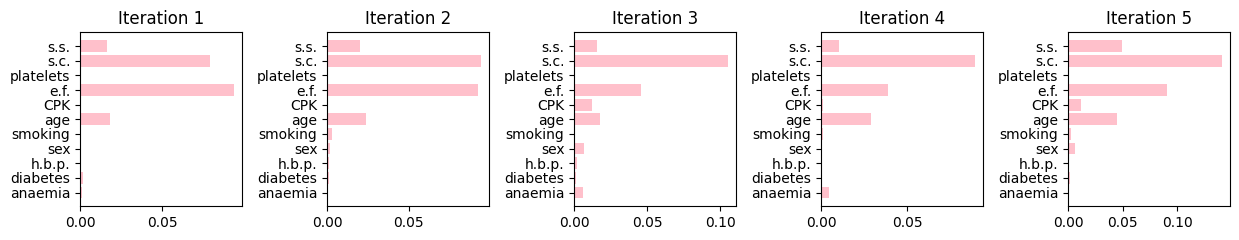

In [42]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(12.5, 2.5))

print("Mutual information with respect to death_state (5 folds)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["death_state"])):
    MI=(mutual_info_classif(kfold_train_df.iloc[train_idx][categorical_features+numerical_features],
                             kfold_train_df.iloc[train_idx]["death_state"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=42))
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['anaemia', 'diabetes', 'h.b.p.','sex', 'smoking', 'age', 'CPK', 'e.f.', 'platelets',
         's.c.', 's.s.'], width=MI, color="#FFC0CB", label="test statistic")
    
plt.tight_layout()  

**Kategorik özelliklerin ölüm durumu (death_state) ile ilişkisinin değerlendirilmesi amacıyla Chi-squared testi, 5 katmanlı çapraz doğrulama yöntemiyle gerçekleştirilmiştir. Her iterasyonda, anaemia, diabetes, HBP, sex ve smoking değişkenlerinin ölüm durumuna katkısını belirlemek için test istatistikleri hesaplanmıştır.**

Chi squared test statistics (5 folds)


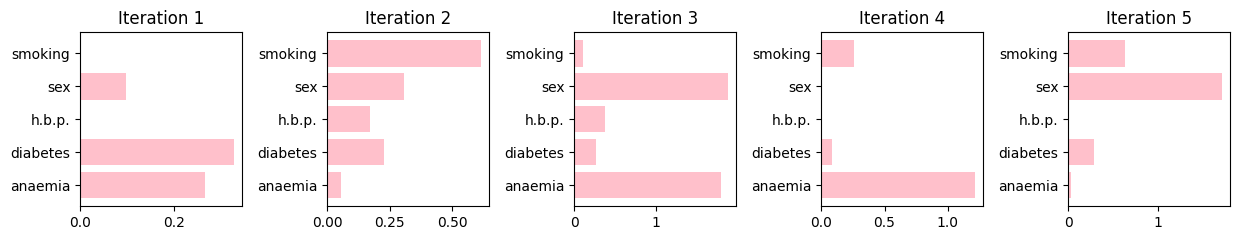

In [43]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(12.5, 2.5))
print("Chi squared test statistics (5 folds)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["death_state"])):
    stats = []
    p_values = []

    for feat in categorical_features:

        stat, p = chi2_test(kfold_train_df.iloc[train_idx], feat, "death_state")
        stats.append(stat)
        p_values.append(p)
    
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['anaemia', 'diabetes', 'h.b.p.', 'sex', 'smoking'], width=stats, color="#FFC0CB", label="test statistic")
plt.tight_layout()

**5 katmanlı çapraz doğrulama iterasyonlarından elde edilen Chi-squared test istatistiklerinin ortalama ve standart sapmaları hesaplanmıştır. Sonuçlar, kategorik özelliklerin ölüm durumu (death_state) ile olan ilişkisini daha sağlam bir şekilde analiz etmeyi amaçlamaktadır. sex ve anaemia değişkenleri, ölüm durumu ile en yüksek ortalama test istatistiklerini göstererek güçlü bir ilişki olduğunu ortaya koymuştur.** 

In [44]:

all_stats = []  

for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["death_state"])):
    stats = []  
    for feat in categorical_features:
        stat, p = chi2_test(kfold_train_df.iloc[train_idx], feat, "death_state")
        stats.append(stat)
    all_stats.append(stats)

all_stats_array = np.array(all_stats)

average_stats = np.mean(all_stats_array, axis=0)
std_dev_stats = np.std(all_stats_array, axis=0)

chi2_summary = pd.DataFrame({
    'Feature': categorical_features,
    'Average Test Statistic': average_stats,
    'Standard Deviation': std_dev_stats
})
chi2_summary.sort_values(by="Average Test Statistic", ascending=False, inplace=True)
print(chi2_summary)


    Feature  Average Test Statistic  Standard Deviation
3       sex                   0.801               0.821
0   anaemia                   0.672               0.708
4   smoking                   0.321               0.259
1  diabetes                   0.237              0.0821
2       HBP                   0.111               0.151


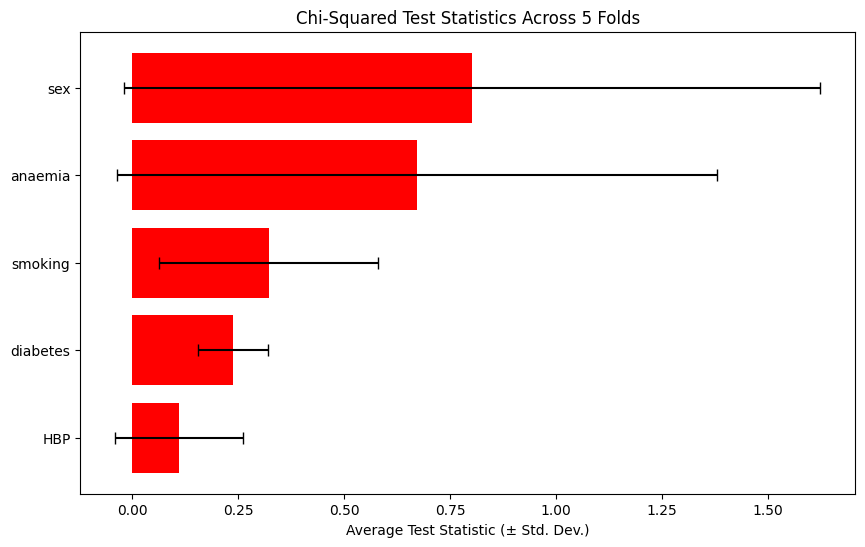

In [45]:
plt.figure(figsize=(10, 6))
plt.barh(chi2_summary['Feature'], chi2_summary['Average Test Statistic'], xerr=chi2_summary['Standard Deviation'], color="#FF0000", capsize=4)
plt.xlabel("Average Test Statistic (± Std. Dev.)")
plt.title("Chi-Squared Test Statistics Across 5 Folds")
plt.gca().invert_yaxis()
plt.show()

**Veri setindeki ölüm durumu dağılımı bir pasta grafiği ile görselleştirilmiştir. Grafiğe göre, bireylerin %68'i hayatta kalırken (alive), %32'si hayatını kaybetmiştir (dead).  Bu dağılım, veri setinin hedef değişkenindeki dengesizlik oranını göstermektedir.**

In [46]:
numerical_features = ['age', 'CPK', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
all_features_kfold = [
    ["anaemia", "diabetes"]+numerical_features,
    ["sex", "smoking"]+numerical_features,
    ["anaemia", "sex"]+numerical_features,
    ["anaemia", "smoking"]+numerical_features,
    ["sex", "smoking"]+numerical_features,
]

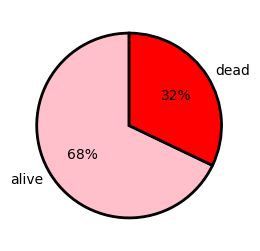

In [47]:
plt.figure(figsize=(3, 3))
plt.pie(hf["death_state"].value_counts(),
        labels = ["alive", "dead"],
        colors = ["#FFC0CB", "#FF0000"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);

**Veri setinde dengesizliği gidermek için uygulanan oversampling işlemini ve bunun etkisini göstermektedir. Soldaki grafik, oversampling öncesinde death_state=1 (ölüm gerçekleşmiş) sınıfının dağılımını temsil ederken, sağdaki grafik aynı sınıfın oversampling sonrası dağılımını göstermektedir. Oversampling öncesinde death_state=1 sınıfı yalnızca 65 örnek içerirken, işlem sonrasında bu sınıfın örnek sayısı 159'a çıkmıştır.** 

In [48]:
n_to_sample = len(ho_train_df[ho_train_df.death_state==0]) - len(ho_train_df[ho_train_df.death_state==1])
new_samples = ho_train_df[ho_train_df.death_state==1].sample(n_to_sample, replace=True, random_state=42)

ho_train_df_rs = pd.concat([ho_train_df, new_samples], ignore_index=True)
unnorm_ho_train_df_rs = pd.concat([unnorm_ho_train_df, new_samples], ignore_index=True)  # Bu satır yeterli

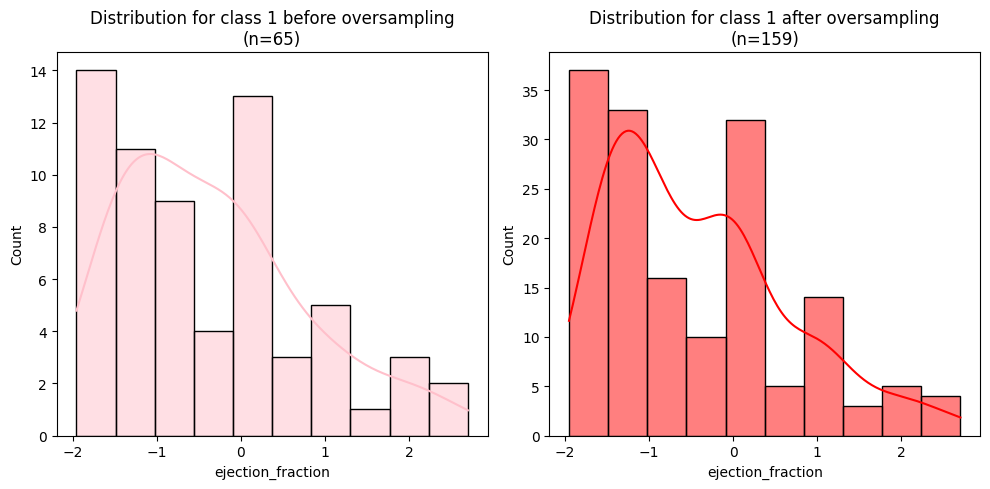

In [49]:

nbins = 10
plt.figure(figsize=(10, 5))  

plt.subplot(1, 2, 1)
plt.title(f"Distribution for class 1 before oversampling\n(n={len(ho_train_df[ho_train_df.death_state==1])})", fontsize=12)
sns.histplot(data=ho_train_df[ho_train_df.death_state==1], x="ejection_fraction", 
             bins=nbins, kde=True, color="#FFC0CB")
plt.ylim(0, None)

plt.subplot(1, 2, 2)
plt.title(f"Distribution for class 1 after oversampling\n(n={len(ho_train_df_rs[ho_train_df_rs.death_state==1])})", fontsize=12)
sns.histplot(data=ho_train_df_rs[ho_train_df_rs.death_state==1], x="ejection_fraction", 
             bins=nbins, kde=True, color="#FF0000")
plt.ylim(0, None)

plt.tight_layout()
plt.show()


**Veri setindeki dengesizliği gidermek için SMOTE (Synthetic Minority Oversampling Technique) yönteminin uygulanmasını ve etkisini göstermektedir. SMOTE, azınlık sınıfına ait örneklerin sayısını artırarak dengesiz veri setlerini dengeler. Soldaki grafik, SMOTE öncesinde azınlık (death_state=1) ve çoğunluk sınıfının (death_state=0) ejection_fraction ve serum_creatinine değişkenleri üzerindeki dağılımını gösterirken, sağdaki grafik SMOTE sonrası azınlık sınıfı örneklerinin arttırılmasıyla elde edilen dengeli dağılımı göstermektedir.** 

In [50]:
def rand_jitter(arr):
    np.random.seed(42)
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [51]:
norm = np.linalg.norm
import random
from random import sample 

def SMOTE(data, sampling_rate, n_neigh, random_state=42):
    random.seed(random_state)
    new_samples = []
    
    if sampling_rate==0:
        return
    
    if sampling_rate>n_neigh: return      
    data = data.reset_index(drop=True)

    n_samples = data.count()[0]

    for i in range(n_samples):
        dists = []
        for j in range(n_samples):
            if i==j: continue
            dists.append((j, norm(data.loc[i]-data.loc[j])))    
        
        topk = sorted(dists, key=lambda s: s[1])[:n_neigh]
        neighs = sample(topk, sampling_rate)

        for neigh in neighs:
            alpha = random.random()
            new_samples.append(data.loc[i] + alpha * (data.loc[neigh[0]]-data.loc[i]))
            
    return new_samples

/Users/mervegun/development/ml_projects/heart-failure-clinical-records-project/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mervegun/development/ml_projects/heart-failure-clinical-records-project/venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


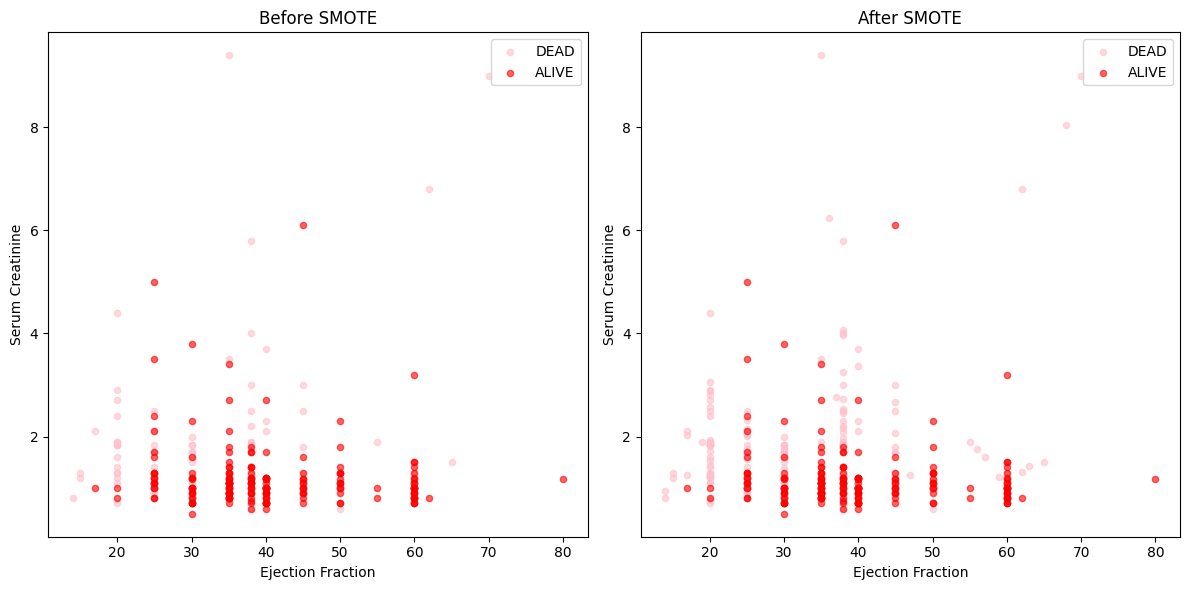

In [52]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(
    hf[["ejection_fraction", "serum_creatinine"]],
    hf["death_state"]
)

sm_hf = pd.DataFrame(X_resampled, columns=["ejection_fraction", "serum_creatinine"])
sm_hf["death_state"] = y_resampled

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(
    hf[hf["death_state"] == 1]["ejection_fraction"],
    hf[hf["death_state"] == 1]["serum_creatinine"],
    s=20, label="DEAD", color="#FFC0CB", alpha=0.6
)
plt.scatter(
    hf[hf["death_state"] == 0]["ejection_fraction"],
    hf[hf["death_state"] == 0]["serum_creatinine"],
    s=20, label="ALIVE", color="#FF0000", alpha=0.6
)
plt.title("Before SMOTE")
plt.xlabel("Ejection Fraction")
plt.ylabel("Serum Creatinine")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(
    sm_hf[sm_hf["death_state"] == 1]["ejection_fraction"],
    sm_hf[sm_hf["death_state"] == 1]["serum_creatinine"],
    s=20, label="DEAD", color="#FFC0CB", alpha=0.6
)
plt.scatter(
    sm_hf[sm_hf["death_state"] == 0]["ejection_fraction"],
    sm_hf[sm_hf["death_state"] == 0]["serum_creatinine"],
    s=20, label="ALIVE", color="#FF0000", alpha=0.6
)
plt.title("After SMOTE")
plt.xlabel("Ejection Fraction")
plt.ylabel("Serum Creatinine")
plt.legend()

plt.tight_layout()
plt.show()


**Sınıf dengesizliğini gidermek için SMOTE (Synthetic Minority Oversampling Technique) uygulanmadan önce ve sonra bir özelliğin dağılımlarını karşılaştırmaktadır. Soldaki grafik, ejection_fraction özelliğinin azınlık sınıfındaki (death_state=1) veriler için SMOTE öncesindeki dağılımını gösterirken, sağdaki grafik aynı özelliğin SMOTE uygulandıktan sonraki dağılımını göstermektedir. SMOTE, azınlık sınıfına ait örneklerin sayısını artırarak sınıflar arasında denge sağlamayı hedefler.**

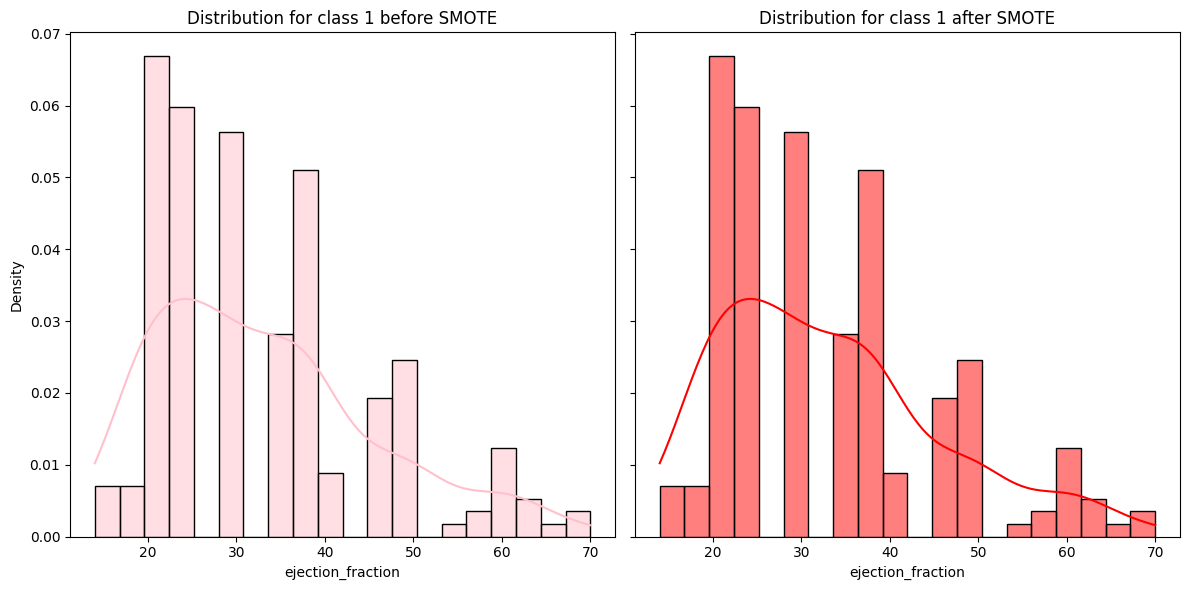

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(data, feature, class_label, title_before, title_after):
 
    data_before = data[data['death_state'] == class_label]

    data_after = data[data['death_state'] == class_label]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    sns.histplot(data_before[feature], kde=True, stat="density", bins=20, ax=axes[0], color="#FFC0CB")
    axes[0].set_title(title_before)
    axes[0].set_xlabel(feature)

    sns.histplot(data_after[feature], kde=True, stat="density", bins=20, ax=axes[1], color="#FF0000")
    axes[1].set_title(title_after)
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

plot_distribution(data=sm_hf,  
                  feature="ejection_fraction",  
                  class_label=1,  
                  title_before="Distribution for class 1 before SMOTE", 
                  title_after="Distribution for class 1 after SMOTE")


**Veri kümesindeki sınıf dengesizliğini ele almak amacıyla her bir sınıf için ağırlıklar hesaplanmıştır. Öncelikle, death_state özelliği tam sayıya dönüştürülerek sınıfların sayısal olarak ifade edilmesi sağlanmıştır. Daha sonra, her sınıfın frekansı np.bincount fonksiyonu kullanılarak elde edilmiştir. Azınlık sınıfının model eğitiminde daha fazla önem kazanması için, her sınıfın frekansına ters orantılı olarak ağırlıklar hesaplanmıştır.** 

In [54]:

ho_train_df["death_state"] = ho_train_df["death_state"].astype(int)

bin_counts = np.bincount(ho_train_df["death_state"])

w = len(ho_train_df) / (2 * bin_counts)

print(f"class 0: {w[0]} \nclass 1: {w[1]}")

class 0: 0.7044025157232704 
class 1: 1.7230769230769232


In [55]:


class KFold():
    
    smote_folds = None
    smote_labels = None
    
    def __init__(self, all_features_kfold, random_state=42):
        self.smote_folds = []
        self.smote_labels = []
        self.features = all_features_kfold
        
        self.kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    def fit_predict(self, model, X, y, threshold = None, resampling = None, cached = False):
        acc, rec, pre, f1 = 0, 0, 0, 0
        
        if resampling=="SMOTE" and not cached:
            self.smote_folds = []
            self.smote_labels = []
        
        for i, (train_idx, val_idx) in enumerate(kf.split(X, y)):
           
            X_fold = X[self.features[i]] 
        
            X_train, X_val = X_fold.iloc[train_idx], X_fold.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            if resampling=="oversampling":
                n_to_sample = len(X_train[y_train==0]) - len(X_train[y_train==1])
                new_samples = X_train[y_train==1].sample(n_to_sample, replace=True, random_state=42)
                
                X_train = X_train.append(new_samples)
                y_train = y_train.append(pd.Series([1]*len(new_samples)))
                
                X_train = X_train.reset_index(drop=True)
                y_train = y_train.reset_index(drop=True)

            if resampling=="SMOTE": 
                if not cached or len(self.smote_folds)<5 or len(self.smote_labels)<5:
                    n_to_sample = len(X_train[y_train==0]) - len(X_train[y_train==1])
                    new_samples = SMOTE(X_train[y_train==1], sampling_rate = 1, n_neigh = 50)

                    for s in new_samples:
                        if "anaemia" in  s.index:
                            s["anaemia"] = np.round(s["anaemia"])
                        if "high_blood_pressure" in s.index:
                            s["high_blood_pressure"] = np.round(s["high_blood_pressure"])
                        if "sex" in  s.index:
                            s["sex"] = np.round(s["sex"])
                        if "smoking" in  s.index:
                            s["smoking"] = np.round(s["smoking"])
                        if "diabetes" in  s.index:
                            s["diabetes"] = np.round(s["diabetes"])
                                            
                    X_train = X_train.append(new_samples, ignore_index=True)
                    y_train = y_train.append(pd.Series([1]*len(new_samples)))
                    
                    X_train = X_train.reset_index(drop=True)
                    y_train = y_train.reset_index(drop=True)
                    
                    self.smote_folds.append(X_train)
                    self.smote_labels.append(y_train)
                    
                else:
                    X_train = self.smote_folds[i]
                    y_train = self.smote_labels[i]

            model.fit(X_train, y_train)
            preds = model.predict(X_val)

            if threshold:
                preds[preds>=threshold] = 1
                preds[preds<threshold] = 0

            acc += accuracy_score(y_val, preds)
            pre += precision_score(y_val, preds)
            rec += recall_score(y_val, preds)
            f1 += f1_score(y_val, preds)

        acc /= 5
        pre /= 5
        rec /= 5
        f1 /= 5
        return acc, pre, rec, f1

In [56]:

kfold = KFold(all_features_kfold, random_state=42)


**Farklı sınıflandırma modellerini (Random Forest, Logistic Regression, Decision Tree, K-Nearest Neighbors ve Naive Bayes) çeşitli örnekleme yöntemleri (Random Sampling, SMOTE ve Class Weight) ile optimize etmek ve değerlendirmek için tasarlanmıştır. Optuna kütüphanesi kullanılarak modeller için hiperparametre optimizasyonu gerçekleştirilmiş ve en iyi hiperparametre değerleri belirlenmiştir. Modeller her bir örnekleme yöntemi için ayrı ayrı eğitilmiş ve test edilmiştir. Performans değerlendirmesi için Accuracy, Precision, Recall, F1 Score ve ROC AUC gibi metrikler hesaplanmıştır. Ayrıca, modellerin ROC eğrileri çizilmiş ve metrikler görsel olarak karşılaştırılmıştır.**

/Users/mervegun/development/ml_projects/heart-failure-clinical-records-project/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-01-06 14:27:39,956] A new study created in memory with name: no-name-4b3f2993-0a81-4a2f-bf48-64c6259bb74b


Best parameters for Random Forest in Random Sampling: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2}


/var/folders/05/npx43vzj0w560gp_g4my_80r0000gn/T/ipykernel_9545/4194700206.py:92: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([


Best parameters for Logistic Regression in Random Sampling: {'C': 10, 'solver': 'lbfgs'}
Best parameters for Decision Tree in Random Sampling: {'max_depth': 20, 'min_samples_split': 5}
Best parameters for K-Nearest Neighbors in Random Sampling: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean'}


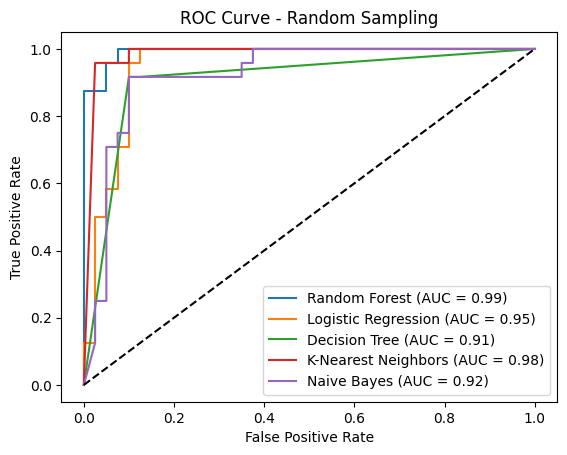

Best parameters for Random Forest in SMOTE: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5}
Best parameters for Logistic Regression in SMOTE: {'C': 1, 'solver': 'liblinear'}
Best parameters for Decision Tree in SMOTE: {'max_depth': None, 'min_samples_split': 5}
Best parameters for K-Nearest Neighbors in SMOTE: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'manhattan'}


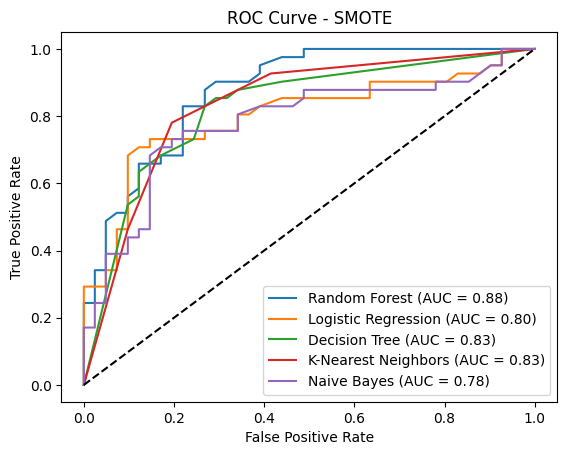

Best parameters for Random Forest in Class Weight: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}
Best parameters for Logistic Regression in Class Weight: {'C': 0.1, 'solver': 'lbfgs'}
Best parameters for Decision Tree in Class Weight: {'max_depth': None, 'min_samples_split': 10}
Best parameters for K-Nearest Neighbors in Class Weight: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean'}


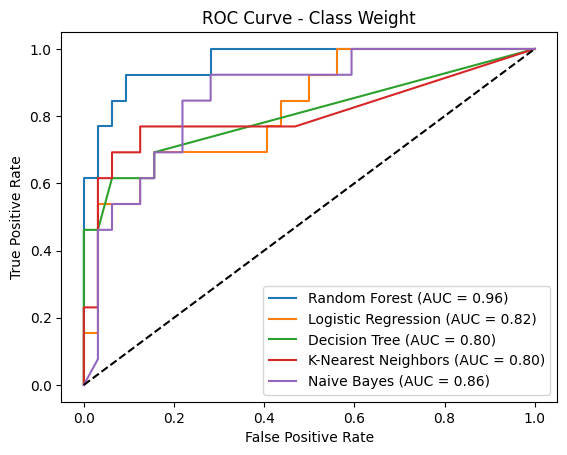


Final Model Comparison Results:

             Method                Model  Accuracy  Precision  Recall  \
0   Random Sampling        Random Forest     0.938      0.885   0.958   
1   Random Sampling  Logistic Regression     0.922      0.828       1   
2   Random Sampling        Decision Tree     0.906      0.846   0.917   
3   Random Sampling  K-Nearest Neighbors     0.891      0.774       1   
4   Random Sampling          Naive Bayes     0.891       0.84   0.875   
5             SMOTE        Random Forest     0.793      0.786   0.805   
6             SMOTE  Logistic Regression      0.78      0.811   0.732   
7             SMOTE        Decision Tree     0.744       0.75   0.732   
8             SMOTE  K-Nearest Neighbors     0.793        0.8    0.78   
9             SMOTE          Naive Bayes     0.659       0.81   0.415   
10     Class Weight        Random Forest     0.867      0.889   0.615   
11     Class Weight  Logistic Regression     0.822      0.857   0.462   
12     Class Weig

<Figure size 1200x600 with 0 Axes>

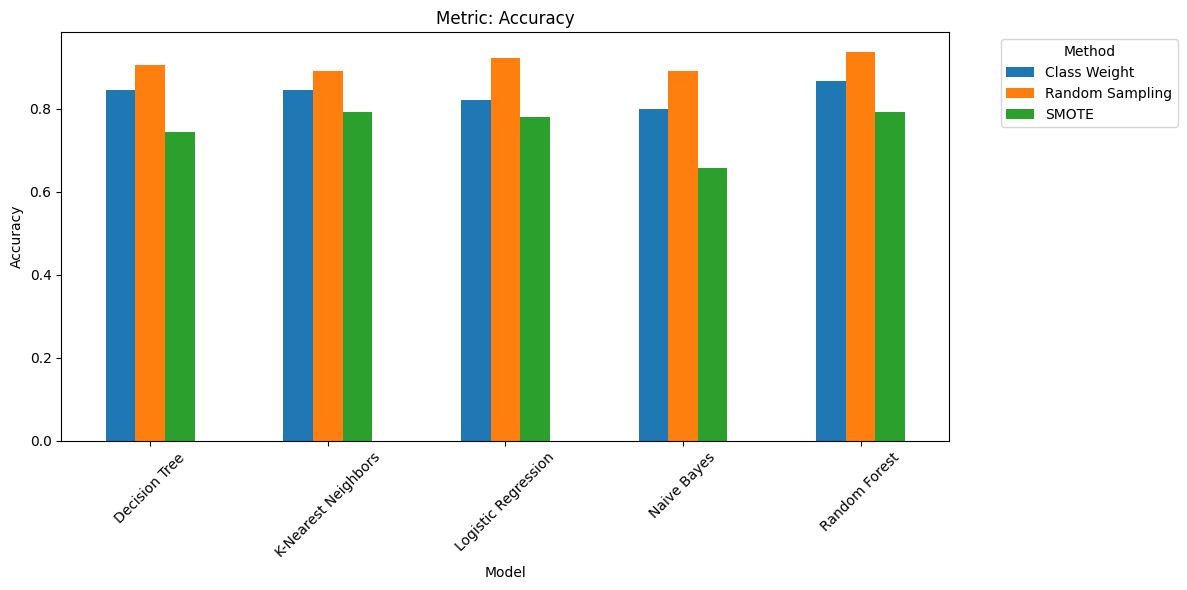

<Figure size 1200x600 with 0 Axes>

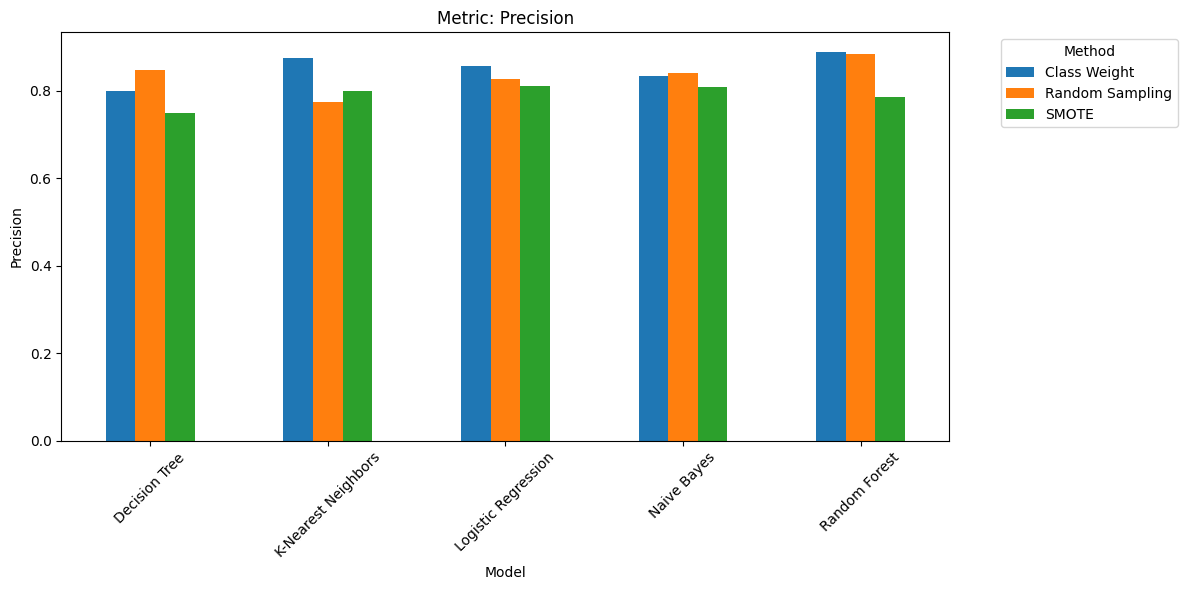

<Figure size 1200x600 with 0 Axes>

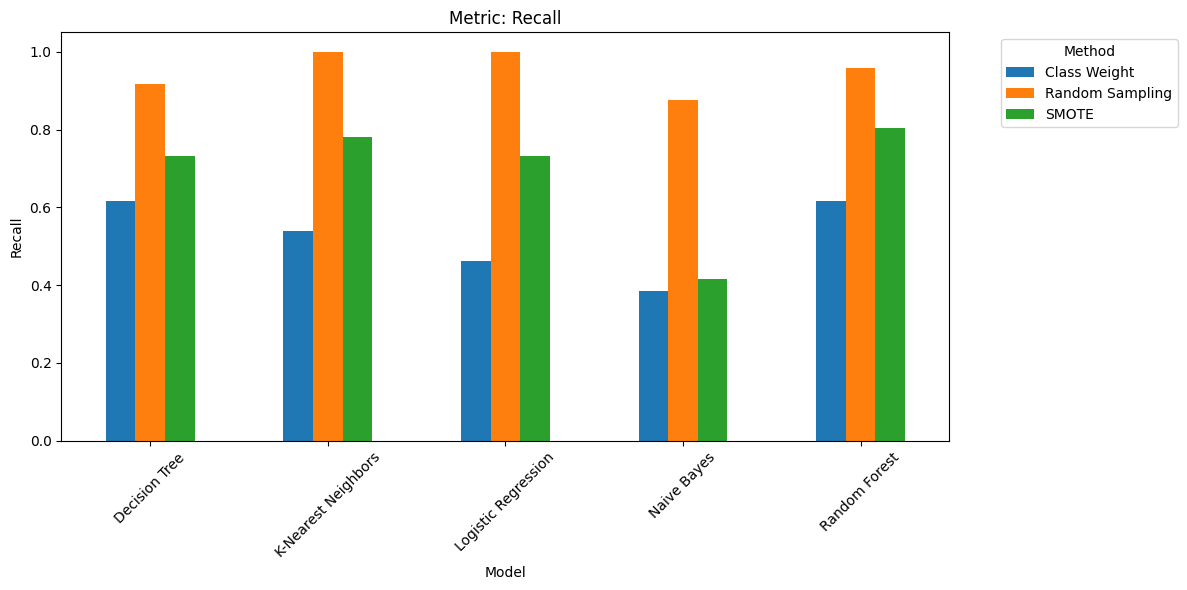

<Figure size 1200x600 with 0 Axes>

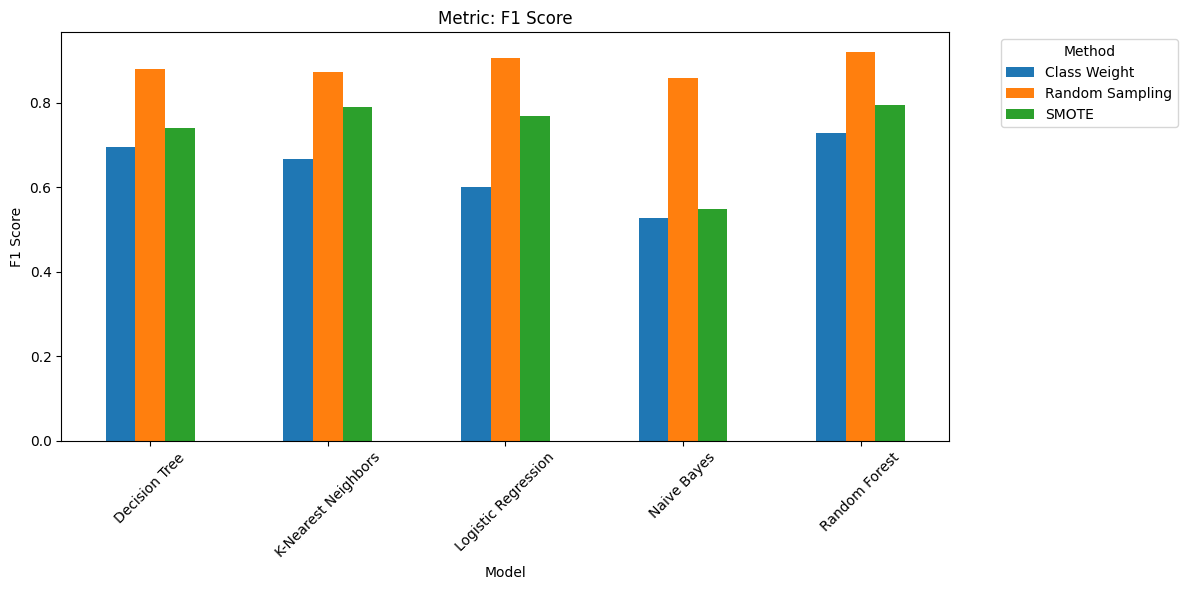

<Figure size 1200x600 with 0 Axes>

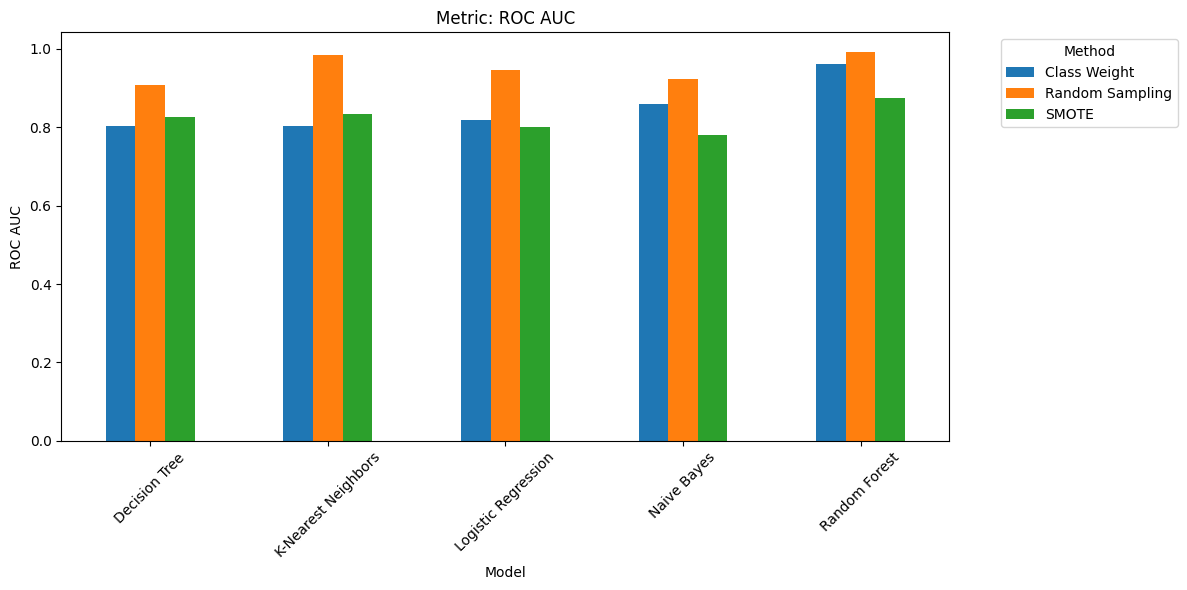

In [57]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

random_sampling_df = ho_train_df_rs  
smote_df = sm_hf  
class_weight_df = ho_train_df  

model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}  
    }
}

def objective(trial, model, params, X_train, y_train):
    param_grid = {key: trial.suggest_categorical(key, values) for key, values in params.items()}
    model.set_params(**param_grid)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
    return scores.mean()

def evaluate_model(X_train, X_test, y_train, y_test, method):
    global results_table
    for model_name, model_info in model_params.items():
        model = model_info['model']
        params = model_info['params']

        if params and model_name != 'Naive Bayes':  
            study = optuna.create_study(direction='maximize')
            optuna.logging.set_verbosity(optuna.logging.WARNING) 
            study.optimize(lambda trial: objective(trial, model, params, X_train, y_train), n_trials=20, show_progress_bar=False)
            best_params = study.best_params
            print(f"Best parameters for {model_name} in {method}:", best_params)
            model.set_params(**best_params)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

        results_table = pd.concat([
            results_table,
            pd.DataFrame({
                'Method': [method],
                'Model': [model_name],
                'Accuracy': [acc],
                'Precision': [prec],
                'Recall': [rec],
                'F1 Score': [f1],
                'ROC AUC': [roc_auc]
            })
        ], ignore_index=True)

        if y_pred_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {method}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

def plot_metrics_comparison(results_table):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        for method in results_table['Method'].unique():
            subset = results_table[results_table['Method'] == method]
            plt.bar(subset['Model'] + f' ({method})', subset[metric], label=method)
        plt.title(f'{metric} Comparison Across Models and Methods')
        plt.xlabel('Model')
        plt.ylabel(metric)
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

results_table = pd.DataFrame(columns=['Method', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

X_train, X_test, y_train, y_test = train_test_split(
    random_sampling_df.drop(columns=['death_state']), random_sampling_df['death_state'], test_size=0.2, random_state=42
)
evaluate_model(X_train, X_test, y_train, y_test, 'Random Sampling')

X_train, X_test, y_train, y_test = train_test_split(
    smote_df.drop(columns=['death_state']), smote_df['death_state'], test_size=0.2, random_state=42
)
evaluate_model(X_train, X_test, y_train, y_test, 'SMOTE')

X_train, X_test, y_train, y_test = train_test_split(
    class_weight_df.drop(columns=['death_state']), class_weight_df['death_state'], test_size=0.2, random_state=42
)
evaluate_model(X_train, X_test, y_train, y_test, 'Class Weight')

print("\nFinal Model Comparison Results:\n")
print(results_table)

def plot_metrics_comparison(results_table):
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']:
        plt.figure(figsize=(12, 6))
        results_table.pivot(index='Model', columns='Method', values=metric).plot(kind='bar', figsize=(12, 6), rot=45)
        plt.title(f'Metric: {metric}')
        plt.ylabel(metric)
        plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

plot_metrics_comparison(results_table)
